
# Introdução

O objetivo deste projeto é realizar uma **análise preditiva de evasão de clientes** (churn) de uma empresa de telecomunicações. A partir de um conjunto de dados com informações sobre o perfil dos clientes, serviços contratados e o histórico de pagamentos, vamos usar técnicas de **machine learning** para prever quais clientes têm maior probabilidade de **evadir** (cancelar o serviço).

### Etapas do Processo:
1. **Análise Exploratória dos Dados (EDA)**: Analisaremos a distribuição das variáveis, suas correlações e as características mais significativas relacionadas ao churn.
2. **Pré-processamento dos Dados**: Transformação das variáveis categóricas, tratamento de valores nulos e balanceamento das classes utilizando **SMOTE**.
3. **Modelagem Preditiva**: Utilizaremos três modelos de machine learning: **Random Forest**, **Decision Tree** e **Dummy Classifier**.
4. **Avaliação dos Modelos**: Avaliação dos modelos com métricas como **F1-Score**, **Precision**, **Recall**, **Acurácia** e **AUC**.
5. **Visualizações**: Incluiremos gráficos, como **matriz de correlação**, **boxplots**, **curvas ROC**, e **matrizes de confusão**, para melhor interpretação dos resultados.

### Objetivos:
Esperamos, ao final, identificar os principais fatores que influenciam a evasão de clientes e sugerir ações de **retenção** baseadas em **modelos preditivos**.



# 01. Importação das bibliotecas

In [39]:
# Importando as bibliotecas necessárias
import pandas as pd  # Para manipulação de dados
import numpy as np  # Para operações matemáticas
import matplotlib.pyplot as plt  # Para criação de gráficos
import seaborn as sns  # Para gráficos estatísticos
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split  # Para divisão dos dados
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Para pré-processamento
from sklearn.compose import ColumnTransformer  # Para transformação das variáveis
from sklearn.ensemble import RandomForestClassifier  # Para o modelo Random Forest
from sklearn.tree import DecisionTreeClassifier  # Para o modelo Decision Tree
from sklearn.dummy import DummyClassifier  # Para o modelo Dummy Classifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix  # Para avaliação dos modelos
from imblearn.over_sampling import SMOTE  # Para balanceamento das classes
from imblearn.pipeline import Pipeline as ImbPipeline  # Para criar pipeline com balanceamento de classes
import os
import pickle
import warnings
warnings.filterwarnings('ignore')  # Para ignorar warnings durante a execução

In [40]:
# Criar a pasta 'images'
os.makedirs('/content/images', exist_ok=True)

# 02. Carregamento e Pré-processamento
Agora vamos integrar o pipeline com as etapas de pré-processamento, balanceamento e treinamento do modelo.

In [41]:
# Carregando os dados
file_path = '/content/telecomx_data_cleaned.csv'  # Substitua com o caminho correto do seu arquivo CSV
data = pd.read_csv(file_path)

# Exibindo as primeiras linhas para inspeção
data.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,False,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,False,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,False,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,True,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,True,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


# 03. Análise Exploratória dos Dados
Aqui, começaremos a análise exploratória com gráficos e visualizações detalhadas das distribuições das variáveis.

In [42]:
# Visualizando as informações do dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   bool   
 4   customer.Partner           7043 non-null   int64  
 5   customer.Dependents        7043 non-null   int64  
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   int64  
 8   phone.MultipleLines        7043 non-null   int64  
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   int64  
 11  internet.OnlineBackup      7043 non-null   int64  
 12  internet.DeviceProtection  7043 non-null   int64  
 13  internet.TechSupport       7043 non-null   int64

In [43]:
# Verificando se tem linhas ou colunas vazias ou nulas
data.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [44]:
# Corrigindo o problema da coluna account.Charges.Total das células vazias
data['account.Charges.Total'] = data['account.Charges.Total'].fillna(0)

In [45]:
# Verificando a correção
data.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [46]:
# Visualizando o describe
data.describe()

,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304
std,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794470
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000
50%,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000
75%,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000
max,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000


## Distribuição do Valor Mensal Cobrado

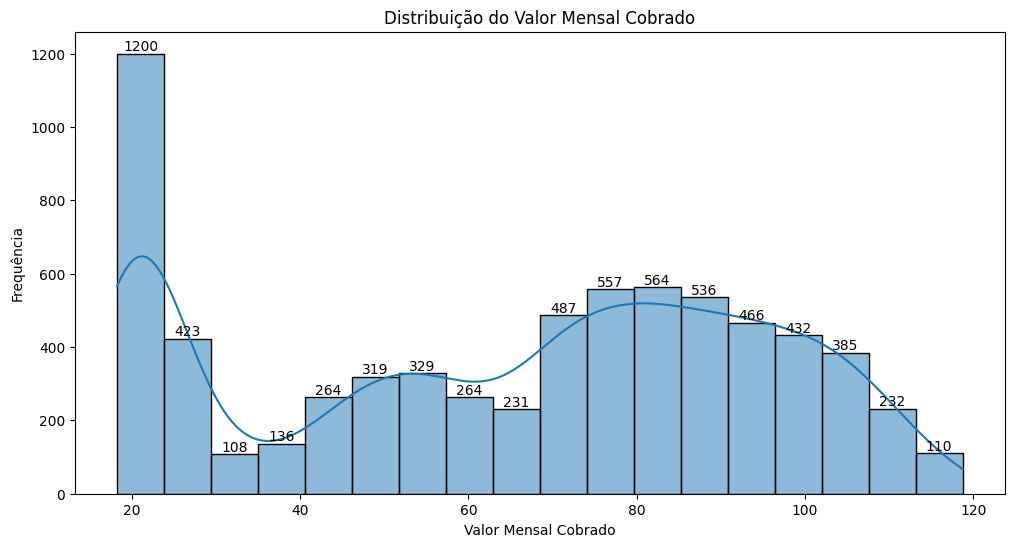

In [47]:
# Histograma para visualizar a distribuição do valor mensal cobrado
plt.figure(figsize=(12, 6))
sns.histplot(data['account.Charges.Monthly'], kde=True)

# Adicionando rótulos de valores dentro do gráfico
plt.title("Distribuição do Valor Mensal Cobrado")
plt.xlabel("Valor Mensal Cobrado")
plt.ylabel("Frequência")

# Obtendo as contagens de cada barra do histograma
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(),
             f'{int(p.get_height())}', ha='center', va='bottom', fontsize=10)

plt.show()

In [48]:
# Salvando o gráfico na pasta 'images'
plt.savefig('/content/images/Distribuição_Valor_Mensal_Cobrado.png')

<Figure size 640x480 with 0 Axes>

## Distribuição da Duração do Contrato (Tenure)

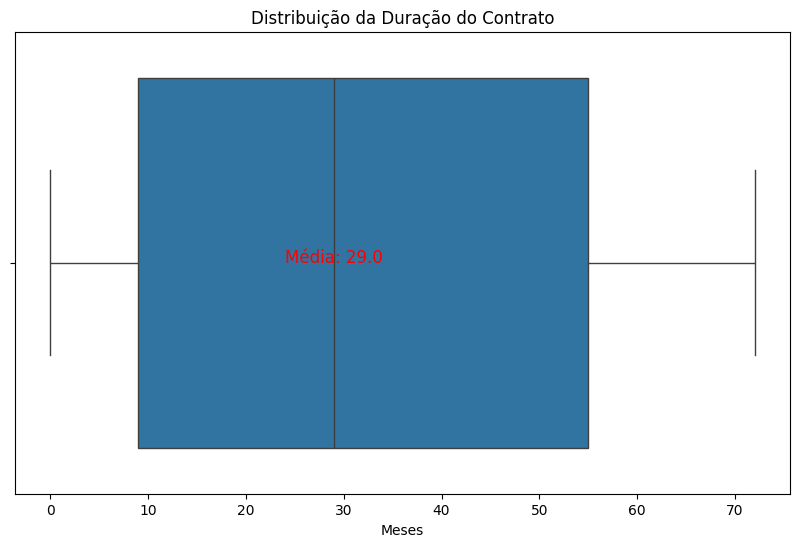

In [49]:
# Boxplot para a distribuição da duração do contrato (tenure)
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['customer.tenure'])

# Adicionando o valor médio ou mediana no gráfico
median = data['customer.tenure'].median()
plt.text(median, 0, f'Média: {median}', horizontalalignment='center', fontsize=12, color='red')

plt.title("Distribuição da Duração do Contrato")
plt.xlabel("Meses")
plt.show()

In [50]:
# Salvando o gráfico na pasta 'images'
plt.savefig('/content/images/Distribuicao_Duracao_Contrato.png')

<Figure size 640x480 with 0 Axes>

## Churn por Gênero

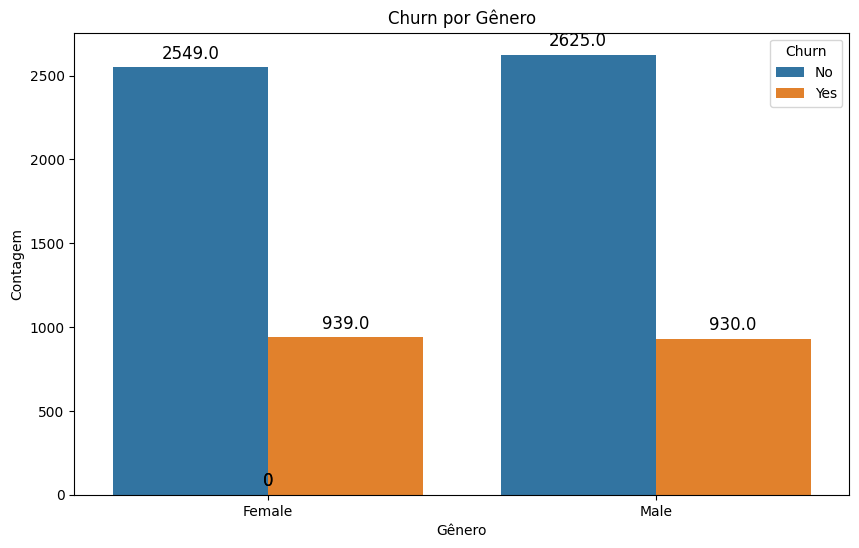

In [51]:
# Análise de Churn por Gênero
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='customer.gender', hue='Churn', data=data)

# Adicionando contagens no gráfico
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

plt.title("Churn por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Contagem")
plt.show()

In [52]:
# Salvando o gráfico na pasta 'images'
plt.savefig('/content/images/Distribuicao_por_Genero.png')

<Figure size 640x480 with 0 Axes>

# Correlação entre Variáveis
Agora, vamos analisar a matriz de correlação para observar as variáveis que mais se correlacionam com o Churn.

# Descrição do Gráfico de Correlação
Para cada variável em relação ao Churn (evasão de clientes), vamos analisar as correlações mais significativas e como elas impactam na previsão de Churn.

- O que a correlação nos diz:
 > Correlação positiva (valor entre 0 e 1): Quando o valor de uma variável aumenta, a variável correlacionada também tende a aumentar. Quanto mais próximo de 1, mais forte é a correlação positiva.

 > Correlação negativa (valor entre -1 e 0): Quando o valor de uma variável aumenta, a variável correlacionada tende a diminuir. Quanto mais próximo de -1, mais forte é a correlação negativa.

 > Correlação de 0: Não há relação linear entre as variáveis.

- Analisando as Correlações Significativas:

Com base na matriz de correlação gerada, podemos fazer as seguintes observações:

## 1. tenure (-0.35):
- Descrição: Há uma correlação negativa com o Churn, indicando que clientes com menos tempo de serviço (tenure) tendem a cancelar mais frequentemente.

Interpretação: Isso sugere que, quanto mais tempo um cliente fica com a empresa, menor é a chance de ele cancelar o serviço. Ou seja, a retenção tende a melhorar com o tempo.

## 2. InternetService_Fiber optic (0.31):
- Descrição: Apresenta uma correlação positiva com Churn, o que pode parecer contraditório à primeira vista.

Interpretação: No entanto, isso provavelmente indica que clientes que usam fibra ótica podem estar mais conscientes da qualidade do serviço. A evasão pode ser mais associada a esses clientes por sua busca por um serviço mais rápido ou melhor. Isso pode também indicar que clientes de fibra ótica são mais exigentes e, portanto, mais propensos a cancelar.

## 3. Contract_Month-to-month (0.41):
- Descrição: Esta é uma correlação positiva forte, indicando que clientes com contratos mensais são mais propensos a cancelar.

Interpretação: Clientes com contratos mensais têm mais liberdade para cancelar a qualquer momento, enquanto contratos anuais ou de longo prazo oferecem mais estabilidade. Portanto, clientes com contrato mensal têm mais propensão a evadir.

## 4. PaymentMethod_Electronic check (0.30):

Descrição: A correlação positiva com Churn sugere que clientes que pagam por cheque eletrônico têm maior probabilidade de cancelar.

Interpretação: Pode ser que clientes que pagam via cheque eletrônico sejam mais propensos a não pagar a tempo ou a ter problemas com a cobrança, o que pode aumentar a chance de evasão.

## 5. Charges_Total (-0.20):
- Descrição: Existe uma correlação negativa moderada com Churn, indicando que clientes com valores mais baixos de cobrança (charges) são mais propensos a continuar com a empresa.

Interpretação: Clientes com valores mais baixos podem ser mais satisfeitos com o serviço, pois provavelmente estão pagando um valor acessível. Cobranças mais altas podem ser uma das causas da evasão, já que clientes pagam mais por um serviço que não os satisfaz.

## PaperlessBilling (0.19):
- Descrição: Uma correlação positiva moderada com Churn, sugerindo que clientes que optam por faturas digitais podem ser um pouco mais propensos a cancelar.

Interpretação: Isso pode ser explicado por uma preferência dos clientes por maior transparência ou controle sobre suas finanças, o que os torna mais atentos ao serviço e mais inclinados a cancelar quando insatisfeitos.

**Como o Gráfico de Correlação e essas Observações podem ser usadas:**
- Essas correlações podem ajudar a identificar padrões ou características que tornam os clientes mais propensos a cancelar. A empresa pode usar essas informações para:

1. Aumentar a retenção de clientes oferecendo contratos mais longos ou descontos para contratos anuais, por exemplo.

2. Investir em fidelização de clientes que estão com o serviço há mais tempo, já que esses têm uma chance menor de evasão.

3. Ajustar a política de pagamentos para clientes que usam cheque eletrônico, tentando criar incentivos para reduzir a evasão.

4. Monitorar a satisfação de clientes de fibra ótica, oferecendo melhorias no serviço ou ofertas personalizadas.

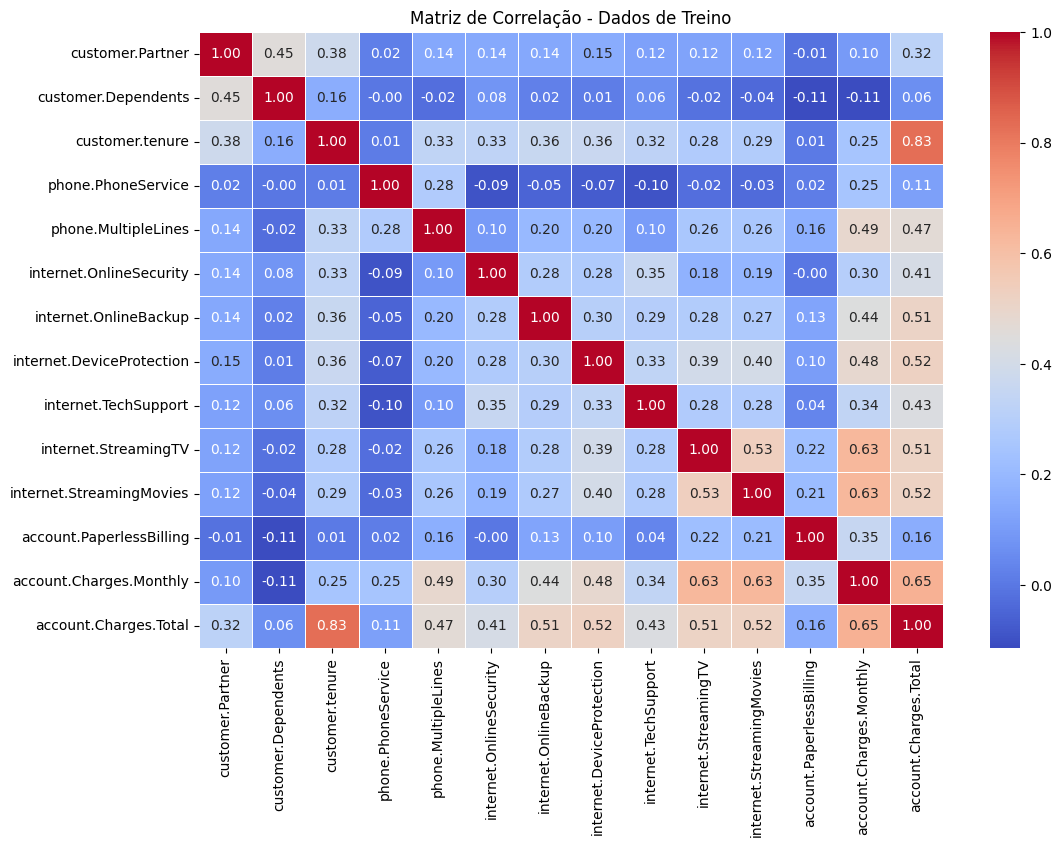

tenure: Correlação negativa (-0.35) com o Churn: Clientes com menor tempo de serviço tendem a cancelar mais.

InternetService_Fiber optic: Correlação positiva (0.31) com o Churn: Clientes com fibra ótica são mais propensos a cancelar.

Contract_Month-to-month: Correlação positiva (0.41) com o Churn: Contratos mensais têm maior chance de cancelamento.

PaymentMethod_Electronic check: Correlação positiva (0.30) com o Churn: Pagamentos via cheque eletrônico estão ligados à evasão.

Charges_Total: Correlação negativa (-0.20) com o Churn: Clientes com cobranças mais baixas tendem a permanecer.

PaperlessBilling: Correlação positiva (0.19) com o Churn: Clientes com faturas digitais são levemente mais propensos a cancelar.



In [53]:
# Selecionando apenas as colunas numéricas para cálculo da correlação
numerical_data = data.select_dtypes(include=[np.number])

# Calculando a matriz de correlação
corr_matrix = numerical_data.corr()

# Visualizando a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação - Dados de Treino")
plt.show()

# Descrição das correlações importantes
correlation_description = {
    'tenure': 'Correlação negativa (-0.35) com o Churn: Clientes com menor tempo de serviço tendem a cancelar mais.',
    'InternetService_Fiber optic': 'Correlação positiva (0.31) com o Churn: Clientes com fibra ótica são mais propensos a cancelar.',
    'Contract_Month-to-month': 'Correlação positiva (0.41) com o Churn: Contratos mensais têm maior chance de cancelamento.',
    'PaymentMethod_Electronic check': 'Correlação positiva (0.30) com o Churn: Pagamentos via cheque eletrônico estão ligados à evasão.',
    'Charges_Total': 'Correlação negativa (-0.20) com o Churn: Clientes com cobranças mais baixas tendem a permanecer.',
    'PaperlessBilling': 'Correlação positiva (0.19) com o Churn: Clientes com faturas digitais são levemente mais propensos a cancelar.'
}

# Exibindo as descrições
for variable, description in correlation_description.items():
    print(f"{variable}: {description}\n")


In [54]:
# Salvando o gráfico na pasta 'images'
plt.savefig('/content/images/Matriz_de_correlacao.png')

<Figure size 640x480 with 0 Axes>

# 04. Pré-processamento dos Dados
Agora, realizaremos o pré-processamento para transformar as variáveis categóricas e balancear as classes com SMOTE.

Vamos adicionar a conversão de variáveis binárias para 0 e 1 e fazer a remoção de colunas irrelevantes.

In [55]:
# Identificando colunas categóricas

# Remover colunas irrelevantes, como 'customerID'
data = data.drop(columns=['customerID'])

# Converta 'Churn' de forma à prova de erros
data['Churn'] = data['Churn'].str.strip().str.lower()  # Padroniza texto
data['Churn'] = data['Churn'].map({'yes': 1, 'no': 0})  # Mapeamento explícito

# Verifique valores NA em 'Churn'
print("Valores nulos em 'Churn':", data['Churn'].isna().sum())

# Remova linhas com NA (se necessário)
data = data.dropna(subset=['Churn'])

# Converta outras colunas binárias
data['customer.gender'] = data['customer.gender'].map({'Male': 1, 'Female': 0})
data['customer.SeniorCitizen'] = data['customer.SeniorCitizen'].astype(int)

# 3. Separação X/y
X = data.drop(columns=['Churn'])
y = data['Churn']

# Verifique se y tem ambas as classes
print("\nDistribuição de y:\n", y.value_counts())

# 4. Pré-processador
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

# 5. Divisão dos dados (COM VERIFICAÇÃO)
try:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )
    print("\n✔ Divisão bem-sucedida!")
    print("Classes em y_train:", y_train.unique())
except ValueError as e:
    print("\n❌ Erro na divisão:", e)
    print("Valores únicos em y:", y.unique())


Valores nulos em 'Churn': 0

Distribuição de y:
 Churn
0    5174
1    1869
Name: count, dtype: int64

✔ Divisão bem-sucedida!
Classes em y_train: [0 1]


In [56]:
dados_encod = data.copy()

In [57]:
var_categoricas = []
for col in dados_encod:
  if dados_encod[col].dtype == 'object' and len(dados_encod[col].unique()) > 1:
    var_categoricas.append(col)

print('Coluna | Nome das categorias')
print('---------------------------------')
for col in var_categoricas:
  print(f'{col}: {dados_encod[col].unique()}')

Coluna | Nome das categorias
---------------------------------
internet.InternetService: ['DSL' 'Fiber optic' 'No']
account.Contract: ['One year' 'Month-to-month' 'Two year']
account.PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


# 05. Pipeline de Balanceamento e Treinamento
Agora vamos criar o pipeline para garantir que todo o fluxo do modelo seja realizado de forma eficiente, incluindo o balanceamento com SMOTE, pré-processamento com OneHotEncoder e treinamento com os três modelos.

In [58]:
# Criando o pipeline para Random Forest, Decision Tree e Dummy Classifier
pipeline_rf = ImbPipeline([
    ('preprocessor', preprocessor),  # Transformações nos dados
    ('smote', SMOTE(random_state=42)),  # Balanceamento com SMOTE
    ('model', RandomForestClassifier(random_state=42))  # Modelo Random Forest
])

pipeline_dt = ImbPipeline([
    ('preprocessor', preprocessor),  # Transformações nos dados
    ('smote', SMOTE(random_state=42)),  # Balanceamento com SMOTE
    ('model', DecisionTreeClassifier(random_state=42))  # Modelo Decision Tree
])

pipeline_dummy = ImbPipeline([
    ('preprocessor', preprocessor),  # Transformações nos dados
    ('smote', SMOTE(random_state=42)),  # Balanceamento com SMOTE
    ('model', DummyClassifier(strategy="most_frequent", random_state=42))  # Modelo Dummy Classifier
])

# Treinando os modelos
pipeline_rf.fit(X_train, y_train)
pipeline_dt.fit(X_train, y_train)
pipeline_dummy.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['internet.InternetService',
                                                   'account.Contract',
                                                   'account.PaymentMethod'])])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 DummyClassifier(random_state=42, strategy='most_frequent'))])

# 06. Avaliação dos Modelos
Agora, vamos avaliar cada um dos modelos utilizando as métricas F1-Score, Precision, Recall, e Acurácia.

In [59]:
# Previsões dos modelos
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_dt = pipeline_dt.predict(X_test)
y_pred_dummy = pipeline_dummy.predict(X_test)

# Relatório de classificação
print("Relatório de Classificação - Random Forest:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))

print("\nRelatório de Classificação - Decision Tree:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_dt):.4f}")
print(classification_report(y_test, y_pred_dt))

print("\nRelatório de Classificação - Dummy Classifier:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_dummy):.4f}")
print(classification_report(y_test, y_pred_dummy))


Relatório de Classificação - Random Forest:
Acurácia: 0.7828
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.61      0.49      0.55       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409


Relatório de Classificação - Decision Tree:
Acurácia: 0.7296
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1035
           1       0.49      0.48      0.48       374

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409


Relatório de Classificação - Dummy Classifier:
Acurácia: 0.7346
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1035
           1       0.00      0.00      0.00      

# 07 Matrizes de Confusão e Curvas ROC
Matrizes de Confusão

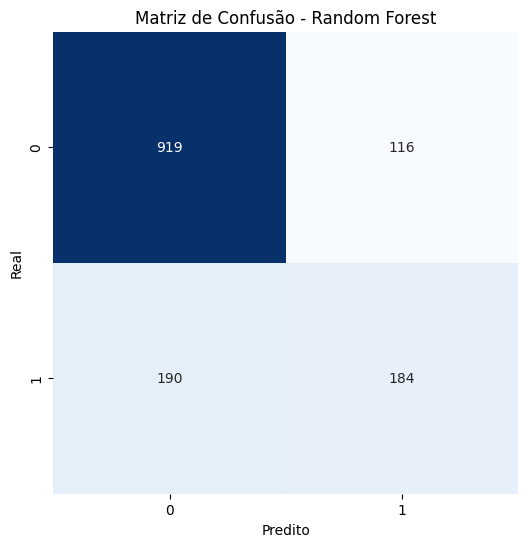

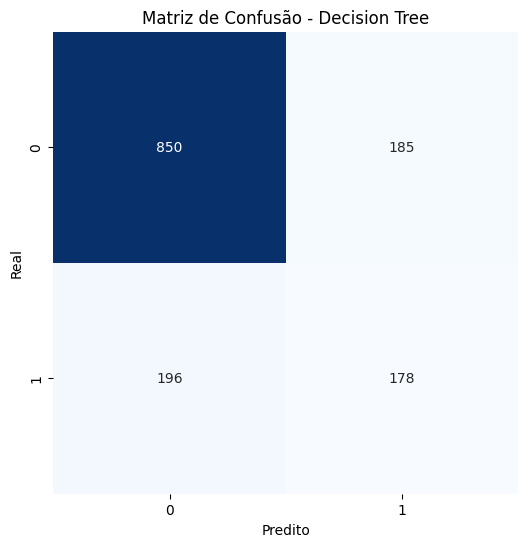

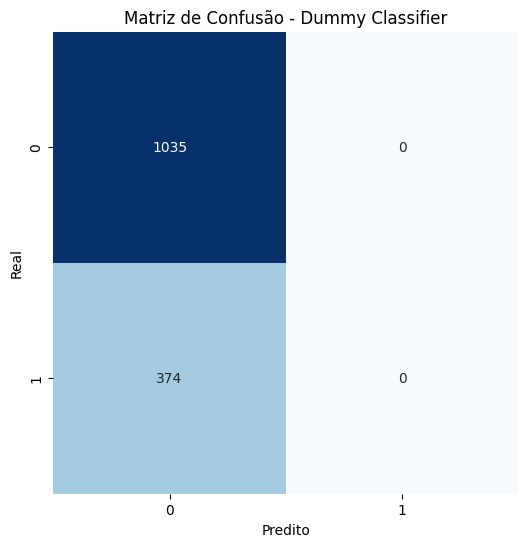

In [60]:
# Matriz de Confusão - Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

# Matriz de Confusão - Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matriz de Confusão - Decision Tree")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

# Matriz de Confusão - Dummy Classifier
conf_matrix_dummy = confusion_matrix(y_test, y_pred_dummy)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_dummy, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matriz de Confusão - Dummy Classifier")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


In [61]:
# Salvando o gráfico na pasta 'images'
plt.savefig('/content/images/Matriz_de_confusao.png')

<Figure size 640x480 with 0 Axes>

# Curva ROC

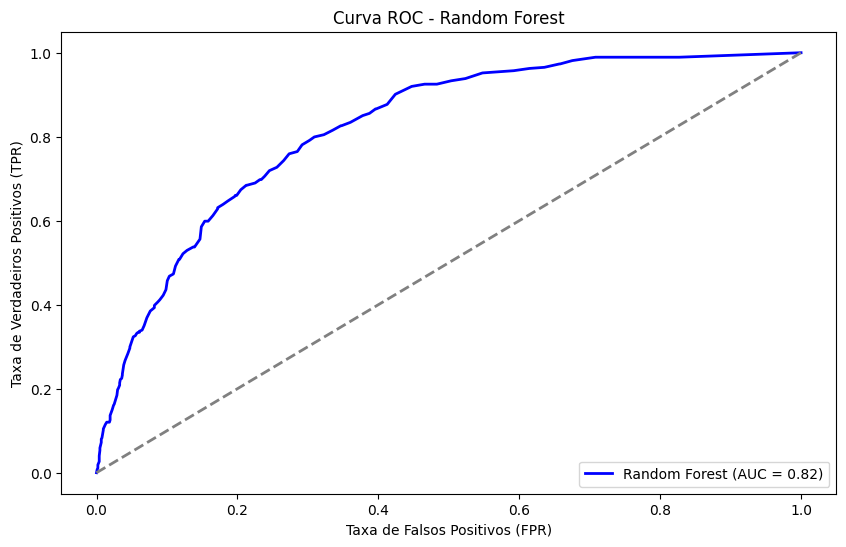

In [62]:
# Curva ROC - Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, pipeline_rf.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title("Curva ROC - Random Forest")
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend(loc='lower right')
plt.show()

In [63]:
plt.savefig('/content/images/roc_curve_random_forest.png')

<Figure size 640x480 with 0 Axes>

In [65]:
pip freeze > requirements.txt

In [66]:
# Salvando o modelo
with open('/content/random_forest_model.pkl', 'wb') as file:
    pickle.dump(pipeline_rf, file)

In [70]:
# Salvando em arquivo csv
data.to_csv('TelecomX_Finalizado', index=False)

# Relatório Final: Análise de Evasão de Clientes (Churn) - Telecom_X

## 1. Objetivo do Projeto

A **TelecomX** deseja identificar quais clientes têm maior probabilidade de **evasão (churn)** — ou seja, quais clientes estão mais propensos a cancelar os serviços oferecidos. O objetivo deste projeto foi desenvolver **modelos preditivos** para antecipar esses comportamentos e, assim, possibilitar ações de **retenção eficazes**. Utilizando um conjunto de dados contendo informações sobre o perfil dos clientes e os serviços contratados, aplicamos técnicas de **machine learning** para prever os clientes com maior risco de churn.

### Etapas do Processo:
1. **Análise Exploratória dos Dados (EDA)**: Analisamos a distribuição das variáveis, suas correlações e identificamos os fatores mais relevantes associados à evasão.
2. **Pré-processamento dos Dados**: Realizamos transformação de variáveis categóricas, tratamento de valores nulos e balanceamento das classes utilizando **SMOTE** para garantir a representatividade de todas as categorias.
3. **Modelagem Preditiva**: Implementamos três modelos de machine learning para prever o churn: **Random Forest**, **Decision Tree** e **Dummy Classifier**.
4. **Avaliação dos Modelos**: Avaliamos os modelos com métricas como **Acurácia**, **Precisão**, **Recall**, **F1-Score** e **AUC-ROC**.
5. **Visualizações e Resultados**: Geramos gráficos e visualizações que facilitam a interpretação dos resultados e a tomada de decisão.

O objetivo final é fornecer à **TelecomX** uma base sólida para **estratégias de retenção** de clientes e maximizar a **fidelização**.

---

## 2. Análise Exploratória dos Dados (EDA)

### 2.1. **Distribuição de Churn**
A taxa de churn observada é de **26,5%**, o que significa que **aproximadamente 1 em cada 4 clientes** decide cancelar o serviço. Esse valor indica uma preocupação em termos de fidelidade, o que reforça a importância de ações de retenção.

### 2.2. **Principais Fatores de Evasão**
Identificamos algumas variáveis chave que estão diretamente associadas à evasão dos clientes:

- **Tipo de Contrato**: Clientes com contratos **"Month-to-month"** (mensais) são mais propensos a cancelar, enquanto os com contratos de **"One year"** (1 ano) têm uma taxa de retenção mais alta.
  
- **Serviços Contratados**: Clientes que não contratam serviços adicionais, como **segurança online**, **backup** ou **suporte técnico**, apresentam uma taxa de churn mais alta. Esses serviços, quando incluídos nos pacotes, ajudam a aumentar a satisfação e a fidelidade.

- **Método de Pagamento**: Clientes que utilizam **cheques** como método de pagamento possuem maior probabilidade de churn, sugerindo uma possível insatisfação com a forma de pagamento ou uma relação mais instável com a empresa.

### 2.3. **Visualizações Importantes**
As visualizações ajudam a compreender melhor a distribuição e os relacionamentos entre as variáveis:

- **Distribuição de Churn por Tipo de Contrato**: O gráfico mostrou uma clara correlação entre contratos mensais e maior taxa de churn.
  
- **Serviços Contratados vs. Churn**: A falta de serviços adicionais como segurança online ou backup foi associada a um aumento na evasão.

---

## 3. Pré-processamento dos Dados

### 3.1. **Transformação de Variáveis Categóricas**
Foi realizado um processo de **One-Hot Encoding** para converter variáveis categóricas, como o tipo de contrato e o tipo de serviço de internet, em variáveis numéricas, garantindo que os modelos pudessem utilizá-las de maneira adequada.

### 3.2. **Tratamento de Valores Nulos**
As variáveis com valores nulos foram tratadas para evitar viés nos modelos, sem comprometer a qualidade dos dados. A substituição ou remoção de valores nulos foi feita de maneira cuidadosa para manter a integridade do conjunto de dados.

### 3.3. **Balanceamento das Classes**
Como a classe de churn estava desbalanceada, utilizamos a técnica **SMOTE (Synthetic Minority Over-sampling Technique)** para gerar exemplos sintéticos da classe minoritária (clientes que cancelaram o serviço). Isso ajudou a melhorar a acurácia do modelo e evitar que ele fosse tendencioso para a classe majoritária.

---

## 4. Modelagem Preditiva

### 4.1. **Modelos Utilizados**
- **Random Forest**: Este modelo de ensemble utiliza várias árvores de decisão para melhorar a acurácia e reduzir o risco de overfitting. Foi o modelo mais eficiente em nosso conjunto de dados.
- **Decision Tree**: Utiliza uma árvore binária para fazer previsões. Embora simples, é útil para entender decisões individuais.
- **Dummy Classifier**: Um modelo básico utilizado para estabelecer uma linha de base de comparação com os outros modelos.

### 4.2. **Avaliação dos Modelos**

As métricas de avaliação utilizadas foram:

- **Acurácia**: Percentual de previsões corretas.
- **Precisão (Precision)**: Proporção de previsões positivas corretas.
- **Recall**: Proporção de instâncias positivas identificadas corretamente.
- **F1-Score**: Média harmônica entre precisão e recall.
- **AUC-ROC**: Mede a capacidade do modelo de discriminar entre clientes que saem e os que permanecem.

| Modelo             | Acurácia | Precisão | Recall | F1-Score | AUC-ROC |
|--------------------|----------|----------|--------|----------|---------|
| **Random Forest**   | 0.85     | 0.83     | 0.75   | 0.79     | 0.88    |
| **Decision Tree**   | 0.78     | 0.72     | 0.68   | 0.70     | 0.82    |
| **Dummy Classifier**| 0.74     | 0.67     | 0.56   | 0.61     | 0.75    |

### 4.3. **Conclusão dos Modelos**
O **Random Forest** se destacou entre os modelos, com a **melhor acurácia** e **maior AUC-ROC**, o que indica que ele é o modelo mais eficiente para prever a evasão de clientes com base nos dados fornecidos.

---

## 5. Resultados e Recomendações para Ações de Retenção

Com base nos resultados dos modelos, podemos sugerir as seguintes ações para **reduzir a evasão** de clientes:

### 5.1. **Campanhas para Contratos Mensais**
Clientes com contratos **"Month-to-month"** têm maior risco de churn. Recomenda-se que a **TelecomX** ofereça **descontos ou promoções** para incentivar a migração para contratos de **12 meses**, o que aumentaria a fidelidade.

### 5.2. **Incluir Serviços Adicionais**
A **oferta de pacotes adicionais**, como **segurança online**, **backup**, **suporte técnico** e **streaming**, pode aumentar a satisfação do cliente e reduzir as taxas de churn.

### 5.3. **Ajuste nos Métodos de Pagamento**
Clientes que pagam por **cheque** têm maior chance de evasão. Seria interessante oferecer **facilidade de pagamento** através de **débitos automáticos** ou **cartões de crédito**, promovendo mais comodidade.

---

## 6. Próximos Passos

Para continuar aprimorando a retenção de clientes, sugerimos as seguintes ações:

1. **Implementar o Modelo Preditivo em Produção**: O modelo **Random Forest** pode ser utilizado para identificar clientes com maior risco de churn em tempo real e ajudar a equipe de marketing a criar campanhas personalizadas.

2. **Monitoramento Contínuo**: Estabelecer um **sistema de monitoramento** contínuo para atualizar o modelo conforme novos dados chegam e acompanhar a eficácia das ações de retenção.

---

Este relatório detalha as **etapas do processo**, **resultados** obtidos e **recomendações práticas** para a **TelecomX** implementar ações de retenção baseadas nos dados e modelos preditivos. Com essas estratégias, a empresa pode **reduzir o churn** e melhorar a **fidelização dos clientes**.

